# Documentation
## Inputs

## Outputs

## Code Summary
The primary function of this script is to solve for the flexural stress experienced along the top and bottom of the canoe. These are plotted against the 

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import _canoeValues as cv
import math

#-------------------Inputs-------------------------------------------------------------
input_files = ["Shear_and_Moment_6 Paddlers.csv", "Shear_and_Moment_4 Paddlers.csv", "Shear_and_Moment_3 Paddlers.csv", "Shear_and_Moment_2 Paddlers.csv", "Shear_and_Moment_Display_Stand.csv"]
moment_files = ["Length_vs_Moment_6 Paddler.csv", "Length_vs_Moment_4 Paddler.csv", "Length_vs_Moment_3 Paddler.csv", "Length_vs_Moment_2 Paddler.csv", "Length_vs_Moment_Display_Stand.csv", ]
inner_file = "Inner Hull.csv"
outer_file = "Outer Hull.csv"
compressive_strength = cv.compressive_strength # MPa
tensile_strength = cv.tensile_strength # MPa
#--------------------------------------------------------------------------------------

script_dir = os.path.abspath('data')

file_path = os.path.join(script_dir, inner_file) # file path for the text file input
in_coor = pd.read_csv(file_path, header=None)

file_path = os.path.join(script_dir, outer_file) # file path for the text file input
out_coor = pd.read_csv(file_path, header=None)

# Get inner and outer hull coordinates (station points)
x_in = in_coor[0]
y_in = in_coor[1]
z_in = in_coor[2]

x_out = out_coor[0]
y_out = out_coor[1]
z_out = out_coor[2]

station_no = x_out.nunique() # number of stations
station_out = x_out.unique() # location of each outer hull station station
station_in = x_in.unique()

# Import StationInformation.csv as a dataframe
file_path = os.path.join(script_dir, "Station Information.csv")
canoe_info = pd.read_csv(file_path, header=None)
#<?> 
stations_mm = [x * float(canoe_info[4][1]) for x in range(1,station_no-2,1)]

In [1]:
# print("Max Positive Moments:\n")
# # Loop through each script
# for input_file in input_files:
#     print("\033[4m" + input_file + ":\033[0m")
#     file_path = os.path.join(script_dir, input_file)
#     info = pd.read_csv(file_path, header=None)

#     # Positive Bending Moment
#     value = float(info[1][3])
#     width = float(info[3][3])
#     depth = float(info[4][3])
#     target_station = float(info[2][3])

#     # Extract Station Information
#     Y1_in = []; Z1_in = []
#     Y2_in = []; Z2_in = []
#     Y1_out = []; Z1_out = []
#     Y2_out = []; Z2_out = []

#     for k in range(1,station_no-2,1):
#         if k == target_station:
#             X1_in = station_in[k]
#             X2_in = station_in[k+1]
#             X1_out = station_out[k]
#             X2_out = station_out[k+1]
            
#             for i in range(0,len(x_out),1):
#                 if x_out[i] == X1_out:
#                     Y1_out.append(y_out[i])
#                     Z1_out.append(z_out[i])

#                 elif x_out[i] == X2_out:
#                     Y2_out.append(y_out[i])
#                     Z2_out.append(z_out[i])
                
#                 if x_in[i] == X1_in:
#                     Y1_in.append(y_in[i])
#                     Z1_in.append(z_in[i])

#                 elif x_in[i] == X2_in:
#                     Y2_in.append(y_in[i])
#                     Z2_in.append(z_in[i])

#     # Find y_bar
#     volume = 0
#     product = 0 # y_bar*Volume
#     for i in range(0,len(Y1_out)-1,1):
#         z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
#         x = (abs(X1_in-X2_in) + abs(X1_out-X2_out))/2
#         y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
#         z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4

#         volume_i = x * y * z
#         volume += volume_i
#         product += volume_i * z_i
        
#     y_bar_top = abs(product/volume)
#     y_bar_bottom = depth - y_bar_top

#     # Find I
#     I = 0
#     for i in range(0,len(Y1_out)-1,1):
#         z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
#         y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
#         z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4
#         I_i = (1/12*y*z**3 + y*z*(abs(z_i) - y_bar_top)**2)/(10**(12)) # [m^4]
#         I = I + I_i

#     stress_top = value*(y_bar_top/1000)/I
#     stress_bottom = value*(y_bar_bottom/1000)/I

#     resistance_top = Top_strength * I / (y_bar_top/1000) * 10**6  # Nm
#     resistance_bottom = Top_strength * I / (y_bar_bottom/1000) * 10**6  # Nm

#     print('Compressive Flexural Stress = ', stress_top/10**6, ' MPa')
#     print('Tensile Flexural Stress = ', stress_bottom/10**6, ' MPa')
#     print("Applied Positive Moment: " + str(value) + ' Nm')
#     print("Resistance Top: " + str(resistance_top) + " Nm")
#     print("Resistance Bottom: " + str(resistance_bottom) + " Nm")
    
#     print("Depth: " + str(depth))
#     print("I: " + str(I))
#     print("Ybar Top: " + str(y_bar_top))
#     print("Ybar Bottom: " + str(y_bar_bottom))
#     # print("\n")
#     print(value, y_bar_top, y_bar_bottom, "\n")

### THE TOP PART OF THE BELOW SECTION APPEARS TO BE A DIRECT COPY OF ABOVE


Positive Moments for Every Station:

Length_vs_Moment_6 Paddler.csv:
1
244.0329885
113.4980397405791
-130.5349487594209
1.8500174798761832e-06
-22134.128030835935
25456.627047864542
-0.3607861761529922
2
315.2137355
146.6037114372186
-168.61002406278138
6.503111412665545e-06
-18763.096277418786
21579.57724134877
-0.8323016132567527
3
332.442401
154.61664301533463
-177.8257579846654
1.0439226985799168e-05
-1060.9441654220086
1220.1998227116185
-0.07163159635409473
4
337.8047615
157.11063988708014
-180.69412161291984
1.3754564773475734e-05
37391.487442496305
-43004.229274850026
3.273512451951469
5
339.395048
157.85026655550567
-181.5447814444943
1.664427742240173e-05
98790.21486572047
-113619.37080001913
10.416781540660475
6
339.842572
158.0584043604467
-181.78416763955332
1.9269225936742447e-05
184754.09861749824
-212487.0877387045
22.523753060806285
7
339.961517
158.11372829257272
-181.8477887074273
2.1706483711847546e-05
295576.81136292266
-339945.1149496721
40.57796442303295
8
339.99

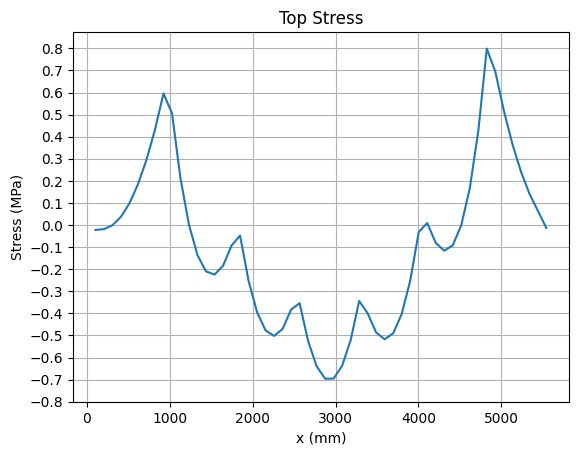

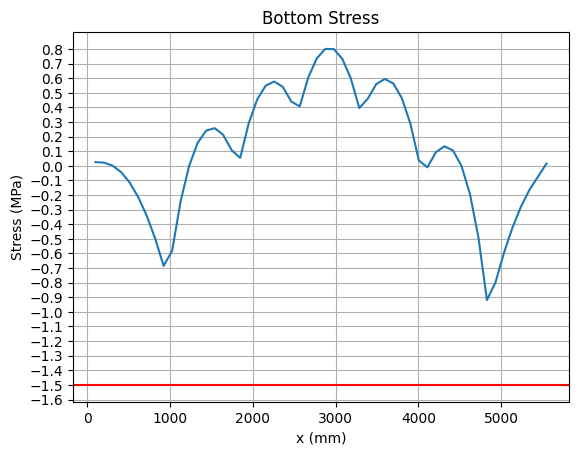

Length_vs_Moment_4 Paddler.csv:
1
244.0329885
113.4980397405791
-130.5349487594209
1.8500174798761832e-06
39449.97569957816
-45371.71362849265
0.6430344065124544
2
315.2137355
146.6037114372186
-168.61002406278138
6.503111412665545e-06
64653.28368044473
-74358.22470132982
2.867918573457501
3
332.442401
154.61664301533463
-177.8257579846654
1.0439226985799168e-05
109542.85672709257
-125986.05912928071
7.395987416009167
4
337.8047615
157.11063988708014
-180.69412161291984
1.3754564773475734e-05
170744.43175660816
-196374.44757867465
14.94816231411519
5
339.395048
157.85026655550567
-181.5447814444943
1.664427742240173e-05
248366.74149223795
-285648.46158453875
26.188647242107287
6
339.842572
158.0584043604467
-181.78416763955332
1.9269225936742447e-05
342485.03257007914
-393894.6291826351
41.75305640499634
7
339.961517
158.11372829257272
-181.8477887074273
2.1706483711847546e-05
452613.7453494775
-520554.47442292323
62.13662151465599
8
339.991217
158.12754178870915
-181.86367521129085
2.

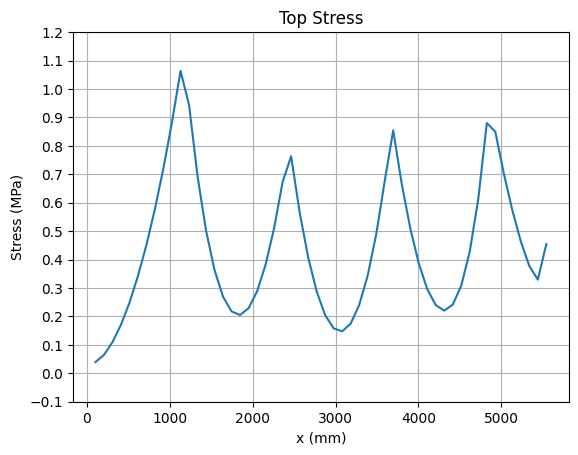

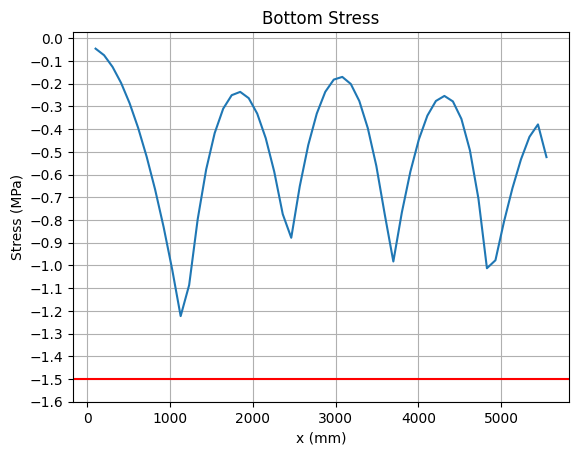

Length_vs_Moment_3 Paddler.csv:
1
244.0329885
113.4980397405791
-130.5349487594209
1.8500174798761832e-06
-39766.04580164653
45735.22822902834
-0.6481863475946903
2
315.2137355
146.6037114372186
-168.61002406278138
6.503111412665545e-06
-51199.731352237744
58885.19363307962
-2.2711400278889426
3
332.442401
154.61664301533463
-177.8257579846654
1.0439226985799168e-05
-61811.995430418
71090.43842627347
-4.173350540790862
4
337.8047615
157.11063988708014
-180.69412161291984
1.3754564773475734e-05
-64057.84619891995
73673.40785861829
-5.608072091270544
5
339.395048
157.85026655550567
-181.5447814444943
1.664427742240173e-05
-56059.43702093442
64474.38109512624
-5.911100704996218
6
339.842572
158.0584043604467
-181.78416763955332
1.9269225936742447e-05
-36687.482202278516
42194.55107064879
-4.472646592039303
7
339.961517
158.11372829257272
-181.8477887074273
2.1706483711847546e-05
-5620.856573967059
6464.589442392711
-0.7716536254441003
8
339.991217
158.12754178870915
-181.86367521129085
2.

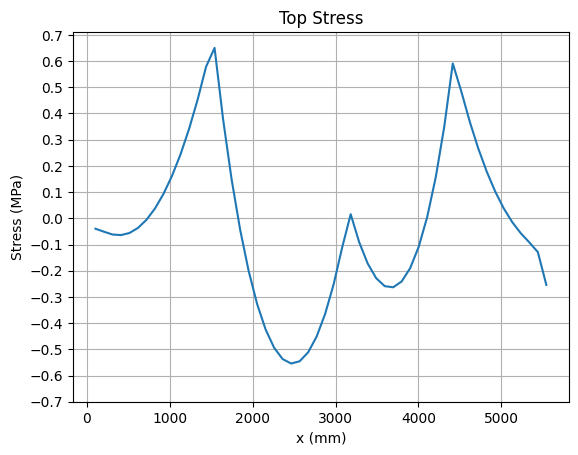

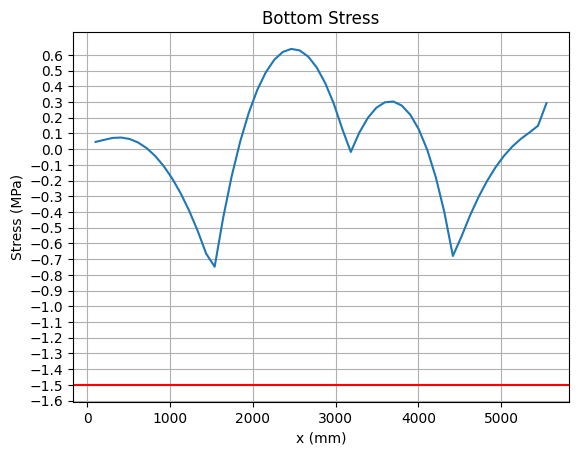

Length_vs_Moment_2 Paddler.csv:
1
244.0329885
113.4980397405791
-130.5349487594209
1.8500174798761832e-06
-3732.806151137258
4293.128416854426
-0.06084472158618472
2
315.2137355
146.6037114372186
-168.61002406278138
6.503111412665545e-06
-253.74301252561463
291.8317348741073
-0.011255643288035758
3
332.442401
154.61664301533463
-177.8257579846654
1.0439226985799168e-05
9624.3047871955
-11068.984945487044
0.6498026363441541
4
337.8047615
157.11063988708014
-180.69412161291984
1.3754564773475734e-05
27400.523260448535
-31513.546669020197
2.398833537205652
5
339.395048
157.85026655550567
-181.5447814444943
1.664427742240173e-05
53597.46550628663
-61642.84909773087
5.651501923251753
6
339.842572
158.0584043604467
-181.78416763955332
1.9269225936742447e-05
88662.73227053654
-101971.67971968571
10.809056482651725
7
339.961517
158.11372829257272
-181.8477887074273
2.1706483711847546e-05
132617.8047169968
-152524.73514756866
18.20630155949395
8
339.991217
158.12754178870915
-181.86367521129085

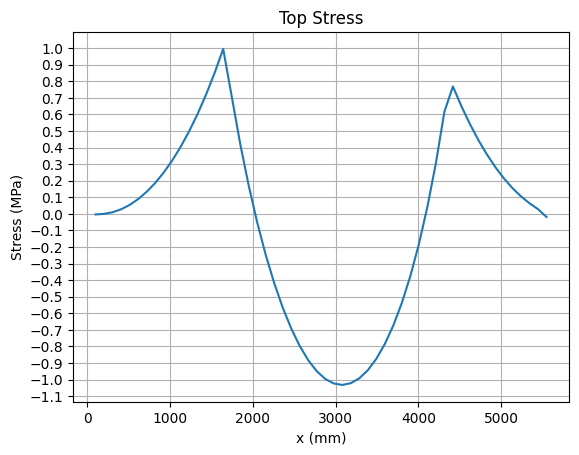

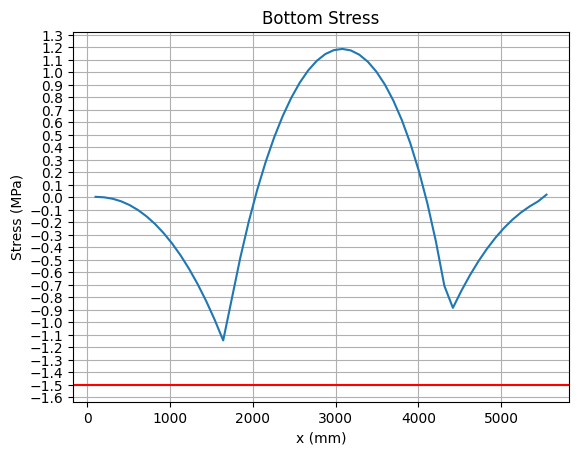

Length_vs_Moment_Display_Stand.csv:
1
244.0329885
113.4980397405791
-130.5349487594209
1.8500174798761832e-06
-676.1645022430413
777.6618772885988
-0.011021478003325933
2
315.2137355
146.6037114372186
-168.61002406278138
6.503111412665545e-06
-2113.2572923829157
2430.473003898814
-0.0937407892424279
3
332.442401
154.61664301533463
-177.8257579846654
1.0439226985799168e-05
-5331.028832180329
6131.256147027794
-0.3599342151119583
4
337.8047615
157.11063988708014
-180.69412161291984
1.3754564773475734e-05
-10514.573099495616
12092.88913668561
-0.9205193032528088
5
339.395048
157.85026655550567
-181.5447814444943
1.664427742240173e-05
-17789.393937010667
20459.716063824224
-1.875775152776703
6
339.842572
158.0584043604467
-181.78416763955332
1.9269225936742447e-05
-27255.919730533475
31347.239658110786
-3.3228253665250493
7
339.961517
158.11372829257272
-181.8477887074273
2.1706483711847546e-05
-38912.9060849228
44754.026106001336
-5.342119063501378
8
339.991217
158.12754178870915
-181.863

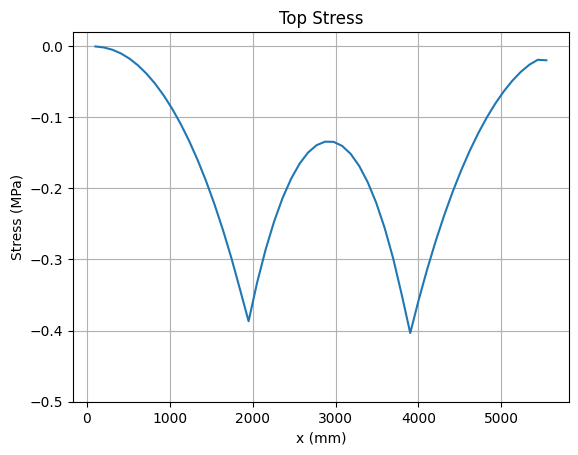

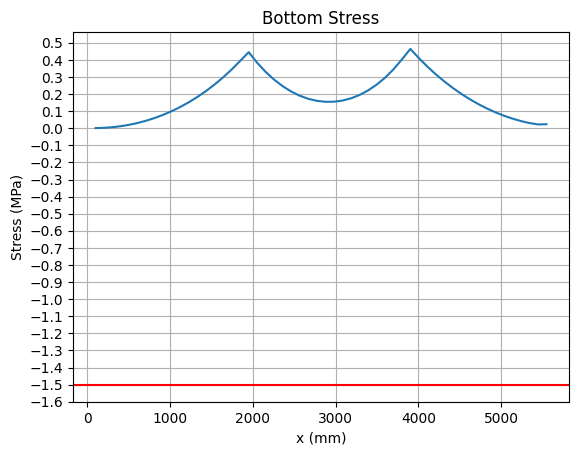

Extrema of Envelope: 408.7682862744822 -355.4174472040823


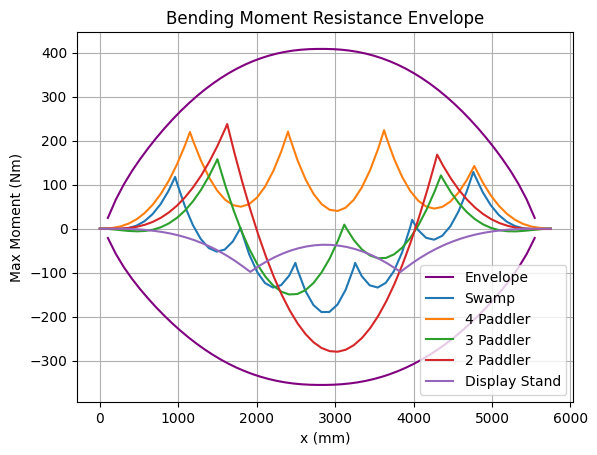

Max Negative Moments:

Shear_and_Moment_6 Paddlers.csv:
Tensile Flexural Stress =  -0.6959523792074325  MPa
Compressive Flexural Stress =  -0.8004200795857914  MPa
Applied Negative Moment: -189.655507584847 Nm
Stress Top: -695952.3792074325 MPa
Stress Bottom: -800420.0795857914 MPa
Resistance Top: 3542.6584810455092 Nm
Resistance Bottom: 3080.284542435381 Nm


Shear_and_Moment_4 Paddlers.csv:
Tensile Flexural Stress =  0.0  MPa
Compressive Flexural Stress =  0.0  MPa
Applied Negative Moment: 0.0 Nm
Stress Top: 0.0 MPa
Stress Bottom: 0.0 MPa
Resistance Top: 211.89993495360488 Nm
Resistance Bottom: 127.51184945188318 Nm


Shear_and_Moment_3 Paddlers.csv:
Tensile Flexural Stress =  -0.554584668548771  MPa
Compressive Flexural Stress =  -0.6378320021895956  MPa
Applied Negative Moment: -149.72819975461826 Nm
Stress Top: -554584.668548771 MPa
Stress Bottom: -637832.0021895956 MPa
Resistance Top: 3509.7735426107665 Nm
Resistance Bottom: 3051.691652548111 Nm


Shear_and_Moment_2 Paddlers.csv:

In [ ]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import _canoeValues as cv
import math

#-------------------Inputs-------------------------------------------------------------
input_files = ["Shear_and_Moment_6 Paddlers.csv", "Shear_and_Moment_4 Paddlers.csv", "Shear_and_Moment_3 Paddlers.csv", "Shear_and_Moment_2 Paddlers.csv", "Shear_and_Moment_Display_Stand.csv"]
moment_files = ["Length_vs_Moment_6 Paddler.csv", "Length_vs_Moment_4 Paddler.csv", "Length_vs_Moment_3 Paddler.csv", "Length_vs_Moment_2 Paddler.csv", "Length_vs_Moment_Display_Stand.csv", ]
inner_file = "Inner Hull.csv"
outer_file = "Outer Hull.csv"
compressive_strength = cv.compressive_strength # MPa
tensile_strength = cv.tensile_strength # MPa
#--------------------------------------------------------------------------------------

script_dir = os.path.abspath('data')

file_path = os.path.join(script_dir, inner_file) # file path for the text file input
in_coor = pd.read_csv(file_path, header=None)

file_path = os.path.join(script_dir, outer_file) # file path for the text file input
out_coor = pd.read_csv(file_path, header=None)

# Get inner and outer hull coordinates (station points)
x_in = in_coor[0]
y_in = in_coor[1]
z_in = in_coor[2]

x_out = out_coor[0]
y_out = out_coor[1]
z_out = out_coor[2]

station_no = x_out.nunique() # number of stations
station_out = x_out.unique() # location of each station
station_in = x_in.unique()

file_path = os.path.join(script_dir, "Station Information.csv")
canoe_info = pd.read_csv(file_path, header=None)
stations_mm = [x * float(canoe_info[4][1]) for x in range(1,station_no-2,1)]
# print("Max Positive Moments:\n")
# # Loop through each script
# for input_file in input_files:
#     print("\033[4m" + input_file + ":\033[0m")
#     file_path = os.path.join(script_dir, input_file)
#     info = pd.read_csv(file_path, header=None)

#     # Positive Bending Moment
#     value = float(info[1][3])
#     width = float(info[3][3])
#     depth = float(info[4][3])
#     target_station = float(info[2][3])

#     # Extract Station Information
#     Y1_in = []; Z1_in = []
#     Y2_in = []; Z2_in = []
#     Y1_out = []; Z1_out = []
#     Y2_out = []; Z2_out = []

#     for k in range(1,station_no-2,1):
#         if k == target_station:
#             X1_in = station_in[k]
#             X2_in = station_in[k+1]
#             X1_out = station_out[k]
#             X2_out = station_out[k+1]
            
#             for i in range(0,len(x_out),1):
#                 if x_out[i] == X1_out:
#                     Y1_out.append(y_out[i])
#                     Z1_out.append(z_out[i])

#                 elif x_out[i] == X2_out:
#                     Y2_out.append(y_out[i])
#                     Z2_out.append(z_out[i])
                
#                 if x_in[i] == X1_in:
#                     Y1_in.append(y_in[i])
#                     Z1_in.append(z_in[i])

#                 elif x_in[i] == X2_in:
#                     Y2_in.append(y_in[i])
#                     Z2_in.append(z_in[i])

#     # Find y_bar
#     volume = 0
#     product = 0 # y_bar*Volume
#     for i in range(0,len(Y1_out)-1,1):
#         z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
#         x = (abs(X1_in-X2_in) + abs(X1_out-X2_out))/2
#         y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
#         z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4

#         volume_i = x * y * z
#         volume += volume_i
#         product += volume_i * z_i
        
#     y_bar_top = abs(product/volume)
#     y_bar_bottom = depth - y_bar_top

#     # Find I
#     I = 0
#     for i in range(0,len(Y1_out)-1,1):
#         z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
#         y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
#         z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4
#         I_i = (1/12*y*z**3 + y*z*(abs(z_i) - y_bar_top)**2)/(10**(12)) # [m^4]
#         I = I + I_i

#     stress_top = value*(y_bar_top/1000)/I
#     stress_bottom = value*(y_bar_bottom/1000)/I

#     resistance_top = Top_strength * I / (y_bar_top/1000) * 10**6  # Nm
#     resistance_bottom = Top_strength * I / (y_bar_bottom/1000) * 10**6  # Nm

#     print('Compressive Flexural Stress = ', stress_top/10**6, ' MPa')
#     print('Tensile Flexural Stress = ', stress_bottom/10**6, ' MPa')
#     print("Applied Positive Moment: " + str(value) + ' Nm')
#     print("Resistance Top: " + str(resistance_top) + " Nm")
#     print("Resistance Bottom: " + str(resistance_bottom) + " Nm")
    
#     print("Depth: " + str(depth))
#     print("I: " + str(I))
#     print("Ybar Top: " + str(y_bar_top))
#     print("Ybar Bottom: " + str(y_bar_bottom))
#     # print("\n")
#     print(value, y_bar_top, y_bar_bottom, "\n")
print("Positive Moments for Every Station:\n")

# Store each paddler case's x and shear to recreate their shear force diagrams later
PAD_CASE_STATIONS = []
PAD_CASE_LENGTH = []
PAD_CASE_MOMENT = []

# Loop through each load case
for input_file in moment_files:
    print("\033[4m" + input_file + ":\033[0m")

    # Get the moments for each station from the file
    file_path = os.path.join(script_dir, input_file)
    momentByLength = pd.read_csv(file_path, header=None)
    momentArray = []
    for i in range(len(station_in)):
        momentArray.append(momentByLength[2][i * round(len(momentByLength[0])/len(station_in)) + 1])

    # Store each paddler case's x and shear to recreate their BMDs later
    PAD_CASE_STATIONS.append(momentByLength[0][1:])
    PAD_CASE_LENGTH.append(momentByLength[1][1:])
    PAD_CASE_MOMENT.append(momentByLength[2][1:])

    # Initialize arrays to store top and bottom resistance (compressive & tensile) for each station
    resistanceCompTopArray = []
    resistanceCompBottomArray = []
    resistanceTensTopArray = []
    resistanceTensBottomArray = []

    # Initialize arrays to store top and bottom stress for each station
    stressTopArray = []
    stressBottomArray = []

    # Loop through each station
    for k in range(1,station_no-2,1):
        print(k)

        # X-coordinates for the sides of this station
        X1_in = station_in[k]
        X2_in = station_in[k+1]
        X1_out = station_out[k]
        X2_out = station_out[k+1]

        # Arrays to store the YZ-coordinates of each point in the station (inner and outer hull)
        Y1_in = []; Z1_in = []
        Y2_in = []; Z2_in = []
        Y1_out = []; Z1_out = []
        Y2_out = []; Z2_out = []

        # Loop through each x coordinate and get every point in the cross-section
        for i in range(0,len(x_in),1):

            if x_out[i] == X1_out:
                Y1_out.append(y_out[i])
                Z1_out.append(z_out[i])

            elif x_out[i] == X2_out:
                Y2_out.append(y_out[i])
                Z2_out.append(z_out[i])
            
            if x_in[i] == X1_in:
                Y1_in.append(y_in[i])
                Z1_in.append(z_in[i])

            elif x_in[i] == X2_in:
                Y2_in.append(y_in[i])
                Z2_in.append(z_in[i])

        # Depth and Moment (Value) for each station
        depth = (abs(min(Z1_out))+abs(min(Z2_out)))/2
        value = float(momentArray[k])

        print(depth)


        # Calculate the canoe's volume (intermediate step for y-bar)
        volume = 0
        product = 0 # y_bar*Volume
        for i in range(0,len(Y1_out)-1,1):
            z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
            x = (abs(X1_in-X2_in) + abs(X1_out-X2_out))/2
            y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
            z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4

            volume_i = x * y * z
            volume += volume_i
            product += volume_i * z_i
        
        # Calculate y-bar from the top and bottom
        y_bar_top = abs(product/volume)
        y_bar_bottom = y_bar_top - depth

        # Calculate I
        I = 0
        for i in range(0,len(Y1_out)-1,1):
            z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
            y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
            z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4
            I_i = (1/12*y*z**3 + y*z*(abs(z_i) - y_bar_top)**2)/(10**(12)) # [m^4]
            I = I + I_i
    

        print(y_bar_top)
        print(y_bar_bottom)
        print(I)

        # Calculate Stress and Resistance from the top and bottom
        stress_top = value*(y_bar_top/1000)/I
        stress_bottom = value*(y_bar_bottom/1000)/I

        print(stress_top)
        print(stress_bottom)
        print(value)

        resistance_top_comp = compressive_strength * I / (y_bar_top/1000) * 10**6  # Nm
        resistance_bottom_comp = compressive_strength * I / (y_bar_bottom/1000) * 10**6  # Nm
        resistance_top_tens = tensile_strength * I / (y_bar_top/1000) * 10**6  # Nm
        resistance_bottom_tens = tensile_strength * I / (y_bar_bottom/1000) * 10**6  # Nm

        # Store this station's top and bottom resistances in arrays
        resistanceCompTopArray.append(resistance_top_comp)
        resistanceCompBottomArray.append(resistance_bottom_comp)
        resistanceTensTopArray.append(resistance_top_tens)
        resistanceTensBottomArray.append(resistance_bottom_tens)

        # Store this station's top and bottom stresses in arrays
        stressTopArray.append(stress_top/10**6)
        stressBottomArray.append(stress_bottom/10**6)

        ## <?><?><?>
        # Rearrange stress_top / stress_bottom


    print("Max Compressive Stress Top:", max(stressTopArray), "MPa")
    print("Max Tensile Stress Top:", min(stressTopArray), "MPa")
    print("Max Compressive Stress Bottom:", max(stressBottomArray), "MPa")
    print("Max Tensile Stress Bottom:", min(stressBottomArray), "MPa")

    # Plot top and bottom stress for each load case
    plt.plot(stations_mm, stressTopArray)
    # plt.axhline(y = -1, color = 'r', linestyle = '-') 
    plt.title('Top Stress')
    plt.xlabel('x (mm)')
    plt.yticks(np.arange(round(min(stressTopArray), 1) - 0.1,round(max(stressTopArray), 1) + 0.1,0.1))
    plt.ylabel('Stress (MPa)')
    plt.grid()
    plt.show()

    plt.plot(stations_mm, stressBottomArray)
    plt.axhline(y = -cv.tensile_strength, color = 'r', linestyle = '-') 
    plt.title('Bottom Stress')
    plt.xlabel('x (mm)')
    plt.yticks(np.arange(round(-cv.tensile_strength, 1) - 0.1,round(max(stressBottomArray), 1) + 0.1,0.1))
    plt.ylabel('Stress (MPa)')
    plt.grid()
    plt.show()


# NOTE for the following graphs:
#   Positive = Compressive
#   Negative = Tensile



# # Plot top and bottom resistance COMP for each load case
# plt.plot(stations_mm, resistanceCompTopArray)
# plt.plot(stations_mm, [-x for x in resistanceTensTopArray])
# # plt.axhline(y = -1.1, color = 'r', linestyle = '-') 
# plt.title('Top resistance')
# plt.xlabel('x (mm)')
# plt.ylabel('Max Moment (Nm)')
# plt.grid()
# plt.show()

# plt.plot(stations_mm, [-x for x in resistanceCompBottomArray])
# plt.plot(stations_mm, resistanceTensBottomArray)
# # plt.axhline(y = -cv.tensile_strength, color = 'r', linestyle = '-') 
# plt.title('Bottom resistance')
# plt.xlabel('x (mm)')
# plt.ylabel('Max Moment (Nm)')
# plt.grid()
# plt.show()

# Tensile Resistance Envelope
plt.plot(stations_mm, resistanceTensTopArray, color="purple", label="Envelope")
plt.plot(stations_mm, resistanceTensBottomArray, color="purple")
# plt.axhline(y = -cv.tensile_strength, color = 'r', linestyle = '-') 

CASE_NAMES = ["Swamp", "4 Paddler", "3 Paddler", "2 Paddler", "Display Stand"]

# Plot all shear force diagrams (2, 3, 4, 6) cases graphed on one graph with the shear_capacity bound 
for i in range(len(CASE_NAMES)):
    lenArray = np.array(list())
    shearArray = np.array(list())
    plt.plot(PAD_CASE_LENGTH[i].astype(float), PAD_CASE_MOMENT[i].astype(float), label=CASE_NAMES[i])

print("Extrema of Envelope:", max(resistanceTensTopArray), min(resistanceTensBottomArray))

plt.title('Bending Moment Resistance Envelope')
plt.xlabel('x (mm)')
plt.ylabel('Max Moment (Nm)')
plt.grid()
plt.legend()
plt.show()

# Negative moment - This has to be fixed
print("Max Negative Moments:\n")
# Loop through each script
for input_file in input_files:
    print("\033[4m" + input_file + ":\033[0m")
    file_path = os.path.join(script_dir, input_file)
    info = pd.read_csv(file_path, header=None)

    value = float(info[1][4])
    width = float(info[3][4])
    depth = float(info[4][4])
    target_station = float(info[2][4])

    # Extract Station Information
    Y1_in = []; Z1_in = []
    Y2_in = []; Z2_in = []
    Y1_out = []; Z1_out = []
    Y2_out = []; Z2_out = []

    for k in range(1,station_no-2,1):
        if k == target_station:
            X1_in = station_in[k]
            X2_in = station_in[k+1]
            X1_out = station_out[k]
            X2_out = station_out[k+1]
            
            for i in range(0,len(x_out),1):
                if x_out[i] == X1_out:
                    Y1_out.append(y_out[i])
                    Z1_out.append(z_out[i])

                elif x_out[i] == X2_out:
                    Y2_out.append(y_out[i])
                    Z2_out.append(z_out[i])
                
                if x_in[i] == X1_in:
                    Y1_in.append(y_in[i])
                    Z1_in.append(z_in[i])

                elif x_in[i] == X2_in:
                    Y2_in.append(y_in[i])
                    Z2_in.append(z_in[i])

    # Find y_bar
    volume = 0
    product = 0 # y_bar*Volume

    depth = 0

    for i in range(0,len(Y1_out)-1,1):
        z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
        x = (abs(X1_in-X2_in) + abs(X1_out-X2_out))/2
        y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
        z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4

        volume_i = y * z # * x
        volume += volume_i
        product += volume_i * z_i

        depth = max(depth, abs(min(Z1_out)), abs(min(Z2_out)))
        
    y_bar_top = abs(product/volume)
    y_bar_bottom = depth - y_bar_top

    

    # Find I
    I = 0
    for i in range(0,len(Y1_out)-1,1):
        z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
        y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
        z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4
        I_i = (1/12*y*z**3 + y*z*(abs(z_i) - y_bar_top)**2)/10**(12) # [m^4]
        I = I + I_i
        

    stress_top = value*(y_bar_top/1000)/I
    stress_bottom = value*(y_bar_bottom/1000)/I

    resistance_top = compressive_strength * I / (y_bar_top/1000) * 10**6  # Nm
    resistance_bottom = compressive_strength * I / (y_bar_bottom/1000) * 10**6  # Nm

    print('Tensile Flexural Stress = ', stress_top/10**6, ' MPa')
    print('Compressive Flexural Stress = ', stress_bottom/10**6, ' MPa')
    print("Applied Negative Moment: " + str(value) + ' Nm')
    print("Stress Top: " + str(stress_top) + " MPa")
    print("Stress Bottom: " + str(stress_bottom) + " MPa")
    print("Resistance Top: " + str(resistance_top) + " Nm")
    print("Resistance Bottom: " + str(resistance_bottom) + " Nm")
    print("\n")




 

In [3]:
# Negative moment - This has to be fixed
print("Max Negative Moments:\n")
# Loop through each script
for input_file in input_files:
    print("\033[4m" + input_file + ":\033[0m")
    file_path = os.path.join(script_dir, input_file)
    info = pd.read_csv(file_path, header=None)

    value = float(info[1][4])
    width = float(info[3][4])
    depth = float(info[4][4])
    target_station = float(info[2][4])

    # Extract Station Information
    Y1_in = []; Z1_in = []
    Y2_in = []; Z2_in = []
    Y1_out = []; Z1_out = []
    Y2_out = []; Z2_out = []

    for k in range(1,station_no-2,1):
        if k == target_station:
            X1_in = station_in[k]
            X2_in = station_in[k+1]
            X1_out = station_out[k]
            X2_out = station_out[k+1]
            
            for i in range(0,len(x_out),1):
                if x_out[i] == X1_out:
                    Y1_out.append(y_out[i])
                    Z1_out.append(z_out[i])

                elif x_out[i] == X2_out:
                    Y2_out.append(y_out[i])
                    Z2_out.append(z_out[i])
                
                if x_in[i] == X1_in:
                    Y1_in.append(y_in[i])
                    Z1_in.append(z_in[i])

                elif x_in[i] == X2_in:
                    Y2_in.append(y_in[i])
                    Z2_in.append(z_in[i])

    # Find y_bar
    volume = 0
    product = 0 # y_bar*Volume

    depth = 0

    for i in range(0,len(Y1_out)-1,1):
        z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
        x = (abs(X1_in-X2_in) + abs(X1_out-X2_out))/2
        y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
        z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4

        volume_i = y * z # * x
        volume += volume_i
        product += volume_i * z_i

        depth = max(depth, abs(min(Z1_out)), abs(min(Z2_out)))
        
    y_bar_top = abs(product/volume)
    y_bar_bottom = depth - y_bar_top

    # Find I
    I = 0
    for i in range(0,len(Y1_out)-1,1):
        z_i = ((Z1_out[i]+Z1_out[i+1]+Z1_in[i]+Z1_in[i+1])/4 + (Z2_out[i]+Z2_out[i+1]+Z2_in[i]+Z2_in[i+1])/4) /2
        y = (abs(Y1_in[i] - Y1_out[i]) + abs(Y1_in[i+1]-Y1_out[i+1]) + abs(Y2_in[i] - Y2_out[i]) + abs(Y2_in[i+1]-Y2_out[i+1]))/4
        z = (abs(Z1_out[i+1]-Z1_out[i]) + abs(Z1_in[i+1]-Z1_in[i]) + abs(Z2_out[i+1]-Z2_out[i]) + abs(Z2_in[i+1]-Z2_in[i]))/4
        I_i = (1/12*y*z**3 + y*z*(abs(z_i) - y_bar_top)**2)/10**(12) # [m^4]
        I = I + I_i

    stress_top = value*(y_bar_top/1000)/I
    stress_bottom = value*(y_bar_bottom/1000)/I

    resistance_top = compressive_strength * I / (y_bar_top/1000) * 10**6  # Nm
    resistance_bottom = compressive_strength * I / (y_bar_bottom/1000) * 10**6  # Nm

    print('Tensile Flexural Stress = ', stress_top/10**6, ' MPa')
    print('Compressive Flexural Stress = ', stress_bottom/10**6, ' MPa')
    print("Applied Negative Moment: " + str(value) + ' Nm')
    print("Stress Top: " + str(stress_top) + " MPa")
    print("Stress Bottom: " + str(stress_bottom) + " MPa")
    print("Resistance Top: " + str(resistance_top) + " Nm")
    print("Resistance Bottom: " + str(resistance_bottom) + " Nm")
    print("\n")


Max Negative Moments:

Shear_and_Moment_6 Paddlers.csv:
Tensile Flexural Stress =  -0.6959523792074325  MPa
Compressive Flexural Stress =  -0.8004200795857914  MPa
Applied Negative Moment: -189.655507584847 Nm
Stress Top: -695952.3792074325 MPa
Stress Bottom: -800420.0795857914 MPa
Resistance Top: 3542.6584810455092 Nm
Resistance Bottom: 3080.284542435381 Nm


Shear_and_Moment_4 Paddlers.csv:
Tensile Flexural Stress =  0.0  MPa
Compressive Flexural Stress =  0.0  MPa
Applied Negative Moment: 0.0 Nm
Stress Top: 0.0 MPa
Stress Bottom: 0.0 MPa
Resistance Top: 211.89993495360488 Nm
Resistance Bottom: 127.51184945188318 Nm


Shear_and_Moment_3 Paddlers.csv:
Tensile Flexural Stress =  -0.554584668548771  MPa
Compressive Flexural Stress =  -0.6378320021895956  MPa
Applied Negative Moment: -149.72819975461826 Nm
Stress Top: -554584.668548771 MPa
Stress Bottom: -637832.0021895956 MPa
Resistance Top: 3509.7735426107665 Nm
Resistance Bottom: 3051.691652548111 Nm


Shear_and_Moment_2 Paddlers.csv: